In [1]:
%autocall 2

Automatic calling is: Full


In [2]:
import os, sys, time

import numpy as np

import slicer, vtk

from IPython.display import IFrame, Image, HTML

In [3]:
import nptdms

<class 'ModuleNotFoundError'>: No module named 'nptdms'

In [4]:
import ipython_memory_usage

<class 'ModuleNotFoundError'>: No module named 'ipython_memory_usage'

In [5]:
!pip

'pip' is not recognized as an internal or external command,
operable program or batch file.


In [6]:
import JupyterNotebooksLib as slicernb

In [6]:
# Show orientation marker in all views
viewNodes = slicer.util.getNodesByClass("vtkMRMLAbstractViewNode")
for viewNode in viewNodes:
  viewNode.SetOrientationMarkerType(slicer.vtkMRMLAbstractViewNode.OrientationMarkerTypeAxes)

# Turn on slice intersections
sliceDisplayNodes = slicer.util.getNodesByClass("vtkMRMLSliceDisplayNode")
for sliceDisplayNode in sliceDisplayNodes:
  sliceDisplayNode.SetIntersectingSlicesVisibility(1)
  
  sliceDisplayNode.SetIntersectingSlicesInteractive(1)
  
  # sliceDisplayNode.SetIntersectingSlicesInteractiveModeEnabled()
  
  sliceDisplayNode.SetIntersectingSlicesInteractiveHandlesVisibilityMode(2)

# Workaround to force visual update (see https://github.com/Slicer/Slicer/issues/6338)
sliceNodes = slicer.util.getNodesByClass('vtkMRMLSliceNode')
for sliceNode in sliceNodes:
    sliceNode.Modified()

In [6]:
datadir = "C:/Users/m142519/Documents/R01 Projects/Excised Hemilarynx Design/02-19-22 Excised Canine CT Scan"

datadir = "C:/Users/m142519/Documents/R01 Projects/Excised Hemilarynx Design/Slicer Excised Canine 2022-02-19"

In [7]:
ls "$datadir"

 Volume in drive C has no label.
 Volume Serial Number is 8C22-592F

 Directory of C:\Users\m142519\Documents\R01 Projects\Excised Hemilarynx Design\Slicer Excised Canine 2022-02-19

09/21/2023  10:12 AM    <DIR>          .
09/21/2023  10:12 AM    <DIR>          ..
09/21/2023  10:12 AM           194,951 2023-09-19-Scene.mrml
09/21/2023  10:12 AM           346,168 2023-09-19-Scene.png
09/19/2023  01:56 PM        45,312,129 21 Non contrast -D.nrrd
09/21/2023  10:12 AM               223 Displacement to color.txt
09/21/2023  10:12 AM               225 Displacement to color_1.txt
09/21/2023  10:12 AM               225 Displacement to color_2.txt
09/21/2023  10:12 AM               225 Displacement to color_3.txt
09/21/2023  10:12 AM               225 Displacement to color_4.txt
09/21/2023  10:12 AM               225 Displacement to color_5.txt
09/21/2023  10:12 AM               225 Displacement to color_6.txt
09/21/2023  10:12 AM           138,558 Ellipsoid.vtk
09/21/2023  10:12 AM          

In [8]:
IFrame("2022-02-11-canine-larynges.pdf", width = 1400, height = 600)

- Condition 1: CT activation (note this scan has trachea as well, just to have a look at it, placed off to side)- Condition 2: CT + TA/LCA
- Condition 3: TA/LCA
- Condition 4: Relaxed
- Condition 5: PCA

In [23]:
# Clear scene
slicer.mrmlScene.Clear(False)

slicer.util.loadScene(os.path.join(datadir,"2023-09-11-Scene.mrml"))

<class 'NameError'>: name 'datadir' is not defined

Traceback (most recent call last):
  File "C:/ProgramData/slicer.org/Slicer 5.5.0-2023-09-07/bin/../lib/Slicer-5.5/qt-scripted-modules/ExtensionWizard.py", line 504, in isMimeDataAccepted
    self.foundModules = ExtensionWizardFileDialog.findModulesFromMimeData(self.qSlicerFileDialog.mimeData())
  File "C:/ProgramData/slicer.org/Slicer 5.5.0-2023-09-07/bin/../lib/Slicer-5.5/qt-scripted-modules/ExtensionWizard.py", line 514, in findModulesFromMimeData
    allFoundModules.extend(ModuleInfo.findModules(localPath, depth=1))
  File "C:\ProgramData\slicer.org\Slicer 5.5.0-2023-09-07\lib\Slicer-5.5\qt-scripted-modules\ExtensionWizardLib\ModuleInfo.py", line 41, in findModules
    entries = [os.path.join(path, entry) for entry in os.listdir(path)]
FileNotFoundError: [WinError 3] The system cannot find the path specified: ''

If you suspect this is an IPython 8.15.0 bug, please report it at:
    https://github.com/ipython/ipython/issues
or send an email to the mailing list at ipython-dev@python

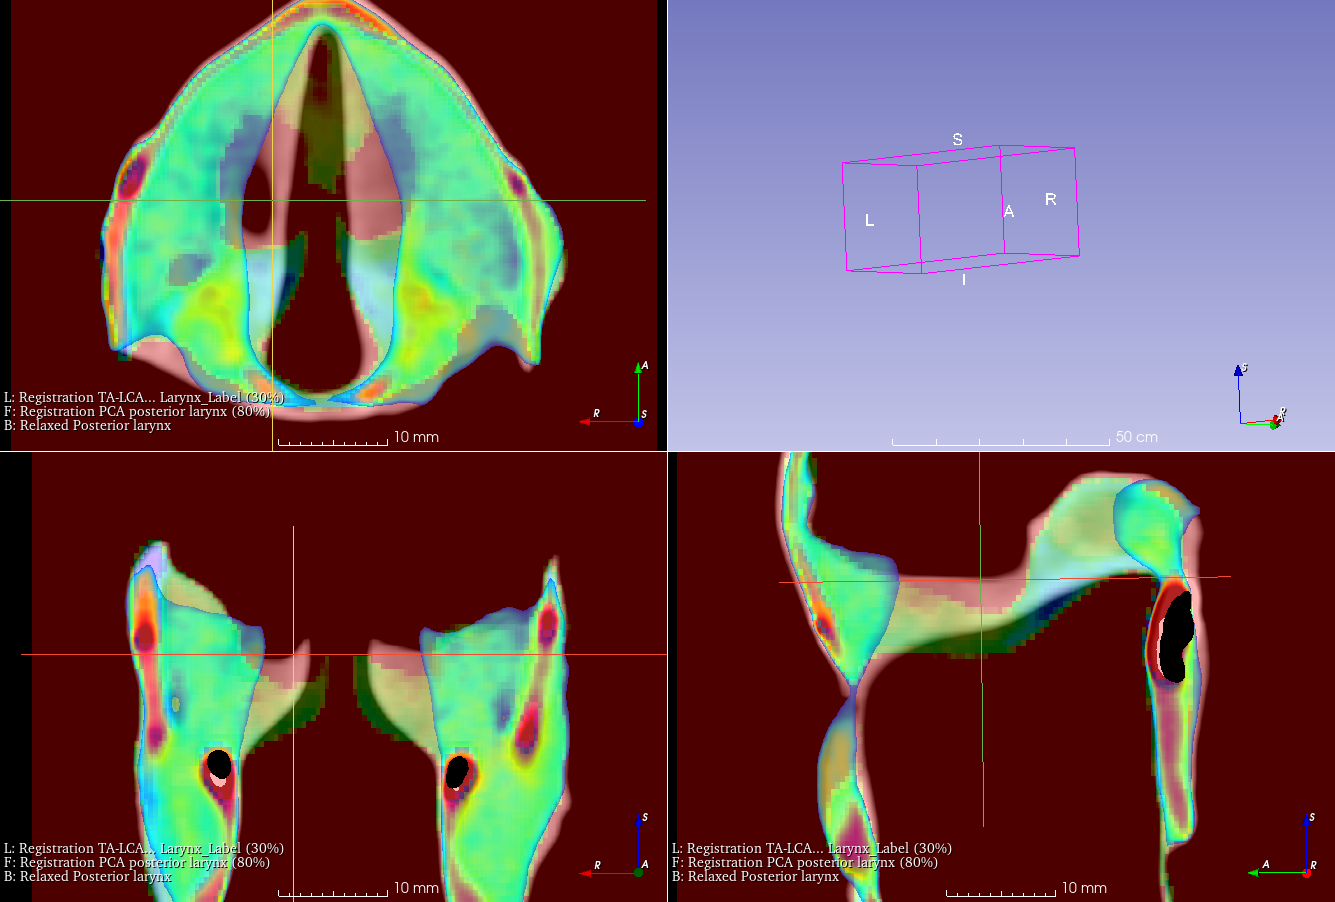

In [11]:
slicernb.ViewDisplay(center = False)

In [12]:
# Create model nodes add to scene, and enable slice intersection display
modelsLogic = slicer.modules.models.logic()

In [31]:
model = slicer.mrmlScene.GetFirstNodeByName("Ellipsoid")

In [32]:
print(model)

vtkMRMLModelNode (0000020226ACC3E0)
  ID: vtkMRMLModelNode6
  ClassName: vtkMRMLModelNode
  Name: Ellipsoid
  Debug: false
  MTime: 2928667
  Description: (none)
  SingletonTag: (none)
  HideFromEditors: false
  Selectable: true
  Selected: false
  UndoEnabled: false
  Attributes:
    Terminologies.AutoUpdateNodeColor:false
    Terminologies.AutoUpdateNodeName:false
    TerminologyEntry:Segmentation category and type - 3D Slicer General Anatomy list~^^~^^~^^~Anatomic codes - DICOM master list~^^~^^
  Node references:
    display [displayNodeRef]: vtkMRMLModelDisplayNode3
    storage [storageNodeRef]: vtkMRMLModelStorageNode1
    transform [transformNodeRef]: (none)
  StorageNodeIDs[0]: vtkMRMLModelStorageNode1
  TransformNodeID: (none)
  DisplayNodeIDs[0]: vtkMRMLModelDisplayNode3
  UnstructuredGrid: (none)
  PolyData:
    Debug: Off
    Modified Time: 1752734
    Reference Count: 2
    Registered Events: 
      Registered Observers:
        vtkObserver (000002028FB047A0)
          Eve

In [33]:
model.GetPolyData().GetBounds()

(-255.7447967529297,
 -240.76791381835938,
 -75.84294128417969,
 -52.7880973815918,
 97.16048431396484,
 117.16048431396484)

In [34]:
model.GetDisplayNode()

<MRMLCorePython.vtkMRMLModelDisplayNode(0x000002028FAA9CE0) at 0x000002022601BFA0>

In [13]:
ellipsoid = vtk.vtkParametricEllipsoid()

ellipsoid.SetXRadius(10)
ellipsoid.SetYRadius(15)
ellipsoid.SetZRadius(10)

ellipsoidSource = vtk.vtkParametricFunctionSource()
ellipsoidSource.SetParametricFunction(ellipsoid)

ellipsoidSource.SetUResolution(50)
ellipsoidSource.SetVResolution(50)
ellipsoidSource.SetWResolution(50)

ellipsoidSource.Update()

transform = vtk.vtkTransform()

translateEllipsoid = vtk.vtkTransformFilter()
translateEllipsoid.SetTransform(transform)
translateEllipsoid.SetInputData(ellipsoidSource.GetOutput())

In [15]:
model = modelsLogic.AddModel(translateEllipsoid.GetOutputPort())

model.SetName('Ellipsoid')

slicer.util.forceRenderAllViews()

print("ellipsoid bounds: ", model.GetPolyData().GetBounds())

dn = model.GetDisplayNode()

dn.SetSliceIntersectionVisibility(True)

dn.SetSliceDisplayModeToIntersection()
# dn.SetSliceDisplayModeToProjection()

dn.SetSliceIntersectionThickness(3)

ellipsoid bounds:  (-4.987163543701172, 4.99743127822876, -9.989727020263672, 9.989727020263672, -15.0, 15.0)


In [28]:
# Get markup node from scene
fiducialpoints = slicer.mrmlScene.GetFirstNodeByName("Fiducials")

if fiducialpoints is not None:
    print("Fiducial points found")

    print("number of control points: ", fiducialpoints.GetNumberOfControlPoints())
    print("control point locations:")
    for num in range(fiducialpoints.GetNumberOfControlPoints()):
          print(fiducialpoints.GetNthControlPointLabel(num), ": ", fiducialpoints.GetNthControlPointDescription(num), ": ", fiducialpoints.GetNthControlPointPosition(num))
else:
    print("No fiducial points found")

    slicer.util.selectModule("Markups")
    
    fiducialpoints = slicer.mrmlScene.AddNewNodeByClass("vtkMRMLMarkupsFiducialNode")
    
    fiducialpoints.SetName('Fiducials')
    
    fiducialpoints.AddControlPoint(0, 0, 0, "center")

Fiducial points found
number of control points:  1
control point locations:
center :   :  (10.840918048444038, 4.6841918378655905, 13.697349608844048)


In [33]:
ellipsoid.SetZRadius(10)

# see arc.SetRatio(0.75)
ellipsoid.SetXRadius(0.75 * 10)

ellipsoidSource.Update()

In [34]:
if fiducialpoints is not None:
    ellipsoidCenter = fiducialpoints.GetNthControlPointPosition(fiducialpoints.GetControlPointIndexByLabel('center'))
    print("new location: ", ellipsoidCenter)
else:
    ellipsoidCenter = [0, 0, 0]

# front = fiducialpoints.GetNthControlPointPosition(1)

# translate
oldLocation = transform.GetPosition()
print("old location: ", oldLocation)
print("difference: ", np.subtract(ellipsoidCenter, oldLocation).tolist())
print()

transform.Translate(np.subtract(ellipsoidCenter, oldLocation))

transformMatrix = vtk.vtkMatrix4x4()
transform.GetMatrix(transformMatrix)
print(transformMatrix)

translateEllipsoid.Update()

new location:  (10.840918048444038, 4.6841918378655905, 13.697349608844048)
old location:  (0.0, 0.0, 0.0)
difference:  [10.840918048444038, 4.6841918378655905, 13.697349608844048]

vtkMatrix4x4 (00000240B9627330)
  Debug: Off
  Modified Time: 276605499
  Reference Count: 1
  Registered Events: (none)
  Elements:
    1 0 0 10.8409 
    0 1 0 4.68419 
    0 0 1 13.6973 
    0 0 0 1 




In [84]:
transform.GetOrientation()

(0.0, -0.0, 0.0)

In [85]:
transform.GetOrientationWXYZ()

(0.0, 0.0, 0.0, 1.0)

In [86]:
ellipsoid.GetXRadius()

12.253385426349949

In [79]:
aplocation = fiducialpoints.GetNthControlPointPosition(fiducialpoints.GetControlPointIndexByLabel("AP ellipsoid"))

In [80]:
ellipsoidCenter

(10.840918048444038, 4.6841918378655905, 13.697349608844048)

In [75]:
try:
    del UpdateEllipsoid
except:
    pass

try:
    fiducialpoints.RemoveObserver(updateIDellipsoid)
except:
    pass

def UpdateEllipsoid(param1 = None, param2 = None):
    """Update from fiducial points"""
    
    # translate ellipsoid
    ellipsoidCenter = fiducialpoints.GetNthControlPointPosition(fiducialpoints.GetControlPointIndexByLabel('center'))
    
    oldLocation = transform.GetPosition()
    transform.Translate(np.subtract(ellipsoidCenter, oldLocation))

    for pointlabel, setfunction in zip(["LR ellipsoid", "AP ellipsoid", "IS ellipsoid"], ["SetXRadius", "SetYRadius", "SetZRadius"]):
        pointlocation = fiducialpoints.GetNthControlPointPosition(fiducialpoints.GetControlPointIndexByLabel(pointlabel))
        ellipsoid.__getattribute__(setfunction)(np.linalg.norm(np.subtract(pointlocation, ellipsoidCenter)))
    ellipsoidSource.Update()
    
    # translate arc
    # arcCenter = ellipsoidCenter - 0.5 * extrusionScale * greennormal
    
    # arc.SetCenter(arcCenter)
    
    slicer.util.forceRenderAllViews()

updateIDellipsoid = fiducialpoints.AddObserver(slicer.vtkMRMLMarkupsNode.PointModifiedEvent, UpdateEllipsoid, 2)

In [ ]:
fiducialpoints.AddControlPoint(np.add(transform.GetPosition(), (ellipsoid.GetXRadius(), 0, 0)), "LR ellipsoid")

fiducialpoints.AddControlPoint(np.add(transform.GetPosition(), (0, ellipsoid.GetYRadius(), 0)), "AP ellipsoid")

fiducialpoints.AddControlPoint(np.add(transform.GetPosition(), (0, 0, ellipsoid.GetZRadius())), "IS ellipsoid")

In [36]:
help(transform.RotateWXYZ)

Help on built-in function RotateWXYZ:

RotateWXYZ(...) method of vtkmodules.vtkCommonTransforms.vtkTransform instance
    RotateWXYZ(self, angle:float, x:float, y:float, z:float) -> None
    C++: void RotateWXYZ(double angle, double x, double y, double z)
    RotateWXYZ(self, angle:float, axis:(float, float, float)) -> None
    C++: void RotateWXYZ(double angle, const double axis[3])
    
    Create a rotation matrix and concatenate it with the current
    transformation according to PreMultiply or PostMultiply
    semantics. The angle is in degrees, and (x,y,z) specifies the
    axis that the rotation will be performed around.



In [37]:
transform.GetOrientation()

(0.0, -0.0, 0.0)

In [ ]:
transform.GetOrientationWXYZ()

In [ ]:
slicer

In [ ]:
arc = vtk.vtkEllipseArcSource()

ellipsoidCenter = fiducialpoints.GetNthControlPointPosition(0)
arcCenter = ellipsoidCenter
arc.SetCenter(arcCenter)

# defines the origin of polar angle and the major radius size
majorRadiusVector = [0, 0, 10]
arc.SetMajorRadiusVector(majorRadiusVector)

# Set normal vector. Represents the plane in which the ellipse will be drawn.
arcNormal = [0, 1, 0]
arc.SetNormal(arcNormal)

# Set the ratio of the ellipse, i.e. the ratio b/a
# b: minor radius; a: major radius
ratio = 1.0 / 3.0
arc.SetRatio(ratio)

arc.SetStartAngle(0)
arc.SetSegmentAngle(180)

# Divide line into resolution number of pieces. Note: if Resolution is set to 1 the arc is a straight line. Default is 100.
arc.SetResolution(100)

# Set/get whether to close the arc with a final line segment connecting the first and last points in the arc.
arc.CloseOn()

arc.Update()

In [297]:
ellipsoidCenter = fiducialpoints.GetNthControlPointPosition(0)
arcCenter = ellipsoidCenter
arc.SetCenter(arcCenter)

arc.Update()

In [298]:
arc.SetRatio(0.75)

arc.Update()

In [ ]:
models

In [299]:
arcmodel = modelsLogic.AddModel(arc.GetOutputPort())

slicer.util.forceRenderAllViews()

arcmodel.GetPolyData().GetBounds()

arcmodel.SetName('arc')

arcmodel.GetDisplayNode().SetSliceIntersectionVisibility(True)

# arcmodel.GetDisplayNode().SetSliceDisplayModeToIntersection()
arcmodel.GetDisplayNode().SetSliceDisplayModeToProjection()

arcmodel.GetDisplayNode().SetSliceIntersectionThickness(3)

In [455]:
slicenodes = {key: dict() for key in ['Red', 'Green', 'Yellow']}

In [458]:
for slicecolor in slicenodes.keys():
    slicenode = slicer.mrmlScene.GetFirstNodeByName(slicecolor)

    slicetoRAS = slicer.util.arrayFromVTKMatrix(slicenode.GetSliceToRAS())
    slicenodes[slicecolor]['slicetoRAS'] = slicetoRAS

    slicenodes[slicecolor]['offset'] = slicenode.GetSliceOffset()
    slicenodes[slicecolor]['origin'] = slicetoRAS.T[3][:3]
    slicenodes[slicecolor]['normal'] = slicetoRAS.T[2][:3]

In [459]:
slicenodes['Green']

{'slicetoRAS': array([[   1.        ,    0.        ,    0.        , -244.5       ],
        [   0.        ,    0.        ,    1.        ,  -64.99740538],
        [   0.        ,    1.        ,    0.        ,   92.40139831],
        [   0.        ,    0.        ,    0.        ,    1.        ]]),
 'offset': -64.99740538471247,
 'origin': array([-244.5       ,  -64.99740538,   92.40139831]),
 'normal': array([0., 1., 0.])}

In [461]:
ellipsoidCenter

(-250.036404571553, -62.90420167347505, 106.45170779380197)

In [442]:
greenslice = slicer.mrmlScene.GetFirstNodeByName('Green')

sliceToRAS = slicer.util.arrayFromVTKMatrix(greenslice.GetSliceToRAS())

greenorigin = sliceToRAS.T[3][:3]

yellownormal = sliceToRAS.T[0][:3]
rednormal = sliceToRAS.T[1][:3]
greennormal = sliceToRAS.T[2][:3]

arc.SetNormal(greennormal)

majorRadiusVector = 10 * rednormal
arc.SetMajorRadiusVector(majorRadiusVector)

arc.Update()

In [ ]:
sliceNodeIds = ["vtkMRMLSliceNodeRed", "vtkMRMLSliceNodeYellow"]

# Print angles between slice nodes
def ShowAngle(unused1=None, unused2=None):
    sliceNormalVector = []
    for sliceNodeId in sliceNodeIds:
        sliceToRAS = slicer.mrmlScene.GetNodeByID(sliceNodeId).GetSliceToRAS()
        sliceNormalVector.append([sliceToRAS.GetElement(0,2), sliceToRAS.GetElement(1,2), sliceToRAS.GetElement(2,2)])
        
    angleRad = vtk.vtkMath.AngleBetweenVectors(sliceNormalVector[0], sliceNormalVector[1])
    angleDeg = vtk.vtkMath.DegreesFromRadians(angleRad)
    
    print("Angle between slice planes = {0:0.3f}".format(angleDeg))

# Observe slice node changes
observerIDs = []
for sliceNodeId in sliceNodeIds:
  observerIDs.append(slicer.mrmlScene.GetNodeByID(sliceNodeId).AddObserver(vtk.vtkCommand.ModifiedEvent, ShowAngle))

# Print current angle
ShowAngle()

for sliceNodeId, observerID in zip(sliceNodeIds, observerIDs):
  slicer.mrmlScene.GetNodeByID(sliceNodeId).RemoveObserver(observerID)

In [ ]:
def onMouseMoved(observer,eventid):
    ras = [0,0,0]
    crosshairNode.GetCursorPositionRAS(ras)
    print(ras)

crosshairNode = slicer.util.getNode("Crosshair")
observerID = crosshairNode.AddObserver(slicer.vtkMRMLCrosshairNode.CursorPositionModifiedEvent, onMouseMoved)

# crosshairNode.RemoveObserver(observerID)

In [454]:
crosshairNode.RemoveObserver(observerID)

In [304]:
help(vtk.vtkRuledSurfaceFilter())

Help on vtkRuledSurfaceFilter object:

class vtkRuledSurfaceFilter(vtkmodules.vtkCommonExecutionModel.vtkPolyDataAlgorithm)
 |  vtkRuledSurfaceFilter - generates a surface from a set of lines
 |  
 |  Superclass: vtkPolyDataAlgorithm
 |  
 |  vtkRuledSurfaceFilter is a filter that generates a surface from a set
 |  of lines. The lines are assumed to be "parallel" in the sense that
 |  they do not intersect and remain somewhat close to one another. A
 |  surface is generated by connecting the points defining each pair of
 |  lines with straight lines. This creates a strip for each pair of
 |  lines (i.e., a triangulation is created from two generating lines).
 |  The filter can handle an arbitrary number of lines, with lines i and
 |  i+1 assumed connected. Note that there are several different
 |  approaches for creating the ruled surface, the method for creating
 |  the surface can either use the input points or resample from the
 |  polylines (using a user-specified resolution).
 |  

In [ ]:
extrude = vtk.vtkLinearExtrusionFilter()

extrude.SetInputConnection(arc.GetOutputPort())

In [ ]:
extrude.SetExtrusionTypeToVectorExtrusion()

extrude.SetVector(greennormal)

extrusionScale = 10

ellipsoidCenter = fiducialpoints.GetNthControlPointPosition(0)
arcCenter = ellipsoidCenter - 0.5 * extrusionScale * greennormal
arc.SetCenter(arcCenter)

extrude.SetScaleFactor(extrusionScale)

extrude.CappingOn()

extrude.Update()

In [323]:
emodel = modelsLogic.AddModel(extrude.GetOutputPort())

slicer.util.forceRenderAllViews()

emodel.GetPolyData().GetBounds()

emodel.SetName('extrude')

emodel.GetDisplayNode().SetSliceIntersectionVisibility(True)

emodel.GetDisplayNode().SetSliceDisplayModeToIntersection()
# emodel.GetDisplayNode().SetSliceDisplayModeToProjection()

emodel.GetDisplayNode().SetSliceIntersectionThickness(3)

In [332]:
help(emodel.GetDisplayNode().SetVisibility2D)

Help on built-in function SetVisibility2D:

SetVisibility2D(...) method of MRMLCore.vtkMRMLModelDisplayNode instance
    SetVisibility2D(self, _arg:int) -> None
    C++: virtual void SetVisibility2D(int _arg)
    
    Set the 2D visibility of the display node.
    \sa Visibility2D, GetVisibility2D(),
    Visibility2DOn(), Visibility2DOff()



In [13]:
slicer.util.selectModule("Volumes")

volumes = slicer.mrmlScene.GetFirstNodeByClass("vtkMRMLScalarVolumeNode")

vdn = volumes.GetNthDisplayNode(0)

print(vdn.GetWindowLevelMin(),
      vdn.GetWindowLevelMax(),
      vdn.GetWindow(),
      vdn.GetLevel(),
      vdn.GetLowerThreshold(),
      vdn.GetUpperThreshold()
     )

-77.0 225.0 302.0 74.0 -100.0 249.0


In [14]:
minLevel = -77
maxLevel = 225
lowerThreshold = -100
upperThreshold = 249

vdn.SetWindowLevelMinMax(minLevel, maxLevel)
vdn.SetLowerThreshold(lowerThreshold)
vdn.SetUpperThreshold(upperThreshold)

In [15]:
vdn.GetColorNodeID()

'vtkMRMLColorTableNodeFileColdToHotRainbow.txt'

In [16]:
print(vdn.GetColorNode())

vtkMRMLColorTableNode (000002020454DC90)
  ID: vtkMRMLColorTableNodeFileColdToHotRainbow.txt
  ClassName: vtkMRMLColorTableNode
  Name: ColdToHotRainbow
  Debug: false
  MTime: 129048
  Description: A color table read in from a text file, each line of the format: IntegerLabel  Name  R  G  B  Alpha
  SingletonTag: FileColdToHotRainbow.txt
  HideFromEditors: true
  Selectable: true
  Selected: false
  UndoEnabled: false
  Attributes:
    Category:Default Labels from File
  Node references:
    storage [storageNodeRef]: vtkMRMLColorTableStorageNode4
  StorageNodeIDs[0]: vtkMRMLColorTableStorageNode4
  Name: ColdToHotRainbow
  Type: (File)
  NoName = (none)
  Names array initialised: true
  Color Names:
    0 (R=0,G=0,B=143) (0, 0, 0.560784, 1)
    1 (R=0,G=0,B=147) (0, 0, 0.576471, 1)
    2 (R=0,G=0,B=151) (0, 0, 0.592157, 1)
    3 (R=0,G=0,B=155) (0, 0, 0.607843, 1)
    4 (R=0,G=0,B=159) (0, 0, 0.623529, 1)
    5 (R=0,G=0,B=163) (0, 0, 0.639216, 1)
    6 (R=0,G=0,B=167) (0, 0, 0.654902, 

In [18]:
help(slicer.util.saveScene)

Help on function saveScene in module slicer.util:

saveScene(filename, properties={})
    Save the current scene.
    
    Based on the value of 'filename', the current scene is saved either
    as a MRML file, MRB file or directory.
    
    If filename ends with '.mrml', the scene is saved as a single file
    without associated data.
    
    If filename ends with '.mrb', the scene is saved as a MRML bundle (Zip
    archive with scene and data files).
    
    In every other case, the scene is saved in the directory
    specified by 'filename'. Both MRML scene file and data
    will be written to disk. If needed, directories and sub-directories
    will be created.



In [19]:
medialsurfacearea = slicer.mrmlScene.GetFirstNodeByName("medial surface area")

In [20]:
medialsurfacearea.GetNumberOfControlPoints()

7

In [21]:
bounds = [0] * 6
medialsurfacearea.GetBounds(bounds)
print({k: i for k, i in zip(['xmin', 'xmax', 'ymin', 'ymax', 'zmin', 'zmax'],  bounds)})

{'xmin': -244.6898481667888, 'xmax': -243.82536554245743, 'ymin': -73.94509118590454, 'ymax': -55.10880914783909, 'zmin': 106.61526221108976, 'zmax': 111.31014863463524}


In [22]:
medialsurfaceplane = slicer.mrmlScene.GetFirstNodeByName("medial surface plane")

In [23]:
medialsurfaceplane.GetCenter()

(-244.32261941426577, -62.66562256812012, 107.09863589002774)

In [24]:
medialsurfaceplane.GetNormal()

(0.99946166632, -0.03272800004576952, -0.002292502966841005)

In [25]:
centerplane = slicer.mrmlScene.GetFirstNodeByName("center plane")

In [26]:
centerplane.GetCenter()

(-241.90121898140865, -68.80517815463895, 106.6009124652592)

In [27]:
centerplane.GetNormal()

(0.999652087796754, 0.026317825124136728, -0.0017536944792797108)

In [144]:
front = fiducialpoints.GetNthControlPointPosition(1)

In [150]:
np.linalg.norm(np.subtract(front, ellipsoidCenter))

11.539276488897544

In [462]:
ellipsoid.GetYRadius()

10.0

In [157]:
transform.Scale(1, np.linalg.norm(np.subtract(front, ellipsoidCenter)) / 10, 1)

In [158]:
translateEllipsoid.Update()

new location:  (-251.43455505371094, -62.63795852661133, 106.535400390625)
old location:  (-244.59163560077397, -62.920791563436765, 106.56134748828518)
difference:  [-6.842919452936968, 0.28283303682543703, -0.025947097660178997]

vtkMatrix4x4 (0000025BDE335960)
  Debug: Off
  Modified Time: 173537336
  Reference Count: 1
  Registered Events: (none)
  Elements:
    1 0 0 -251.435 
    0 1.15393 0 -62.5944 
    0 0 1 106.535 
    0 0 0 1 




slicernb.ViewInteractiveWidget()

# Set viewer size to 50% of screen size
slicernb.AppWindow.setWindowSize(scale = 0.95)

# Hide patient information from slice view
slicernb.showSliceViewAnnotations(True)

# Clear scene
slicer.mrmlScene.Clear(False)

# Load a Slicer sample data set
import SampleData
volume = SampleData.SampleDataLogic().downloadMRBrainTumor1()

In [6]:
print("Volume size: {0}".format(volume.GetImageData().GetDimensions()))

<class 'NameError'>: name 'volume' is not defined

# Show slice view
slicernb.ViewDisplay("OneUpRedSlice", center = False)

In [ ]:
# Lightbox view
slicernb.ViewLightboxDisplay("Red", columns=5, rows=3, rangeShrink=[45,50])

# Enable 3D volume rendering
slicernb.showVolumeRendering(volume)

# Show slice and 3D views
# slicernb.AppWindow.setWindowSize(scale=0.7)  # Use a bit larger size, as we'll display 4 views
slicernb.ViewDisplay("FourUp")  # You can also try: FourUp, OneUpRedSlice, OneUp3D

In [ ]:

markupPoints = np.array([
    [ 69.12484176,  -8.73226641,  -2.175     ],
    [ 56.3258959 ,  32.61817407,  -2.175     ],
    [ 46.15237483,  57.88788769,  -2.175     ],
    [ 34.02739799,  74.35843751,  -2.175     ],
    [  3.93193405,  85.64423649,  -2.175     ],
    [-45.51061385,  62.53521954,  -2.175     ],
    [-61.63318381, -10.01634531,  -2.175     ],
    [-51.97287678, -54.02084408,  -2.175     ],
    [-18.1022449 , -87.94210015,  -2.175     ],
    [ 32.95255999, -83.64274816,  -2.175     ],
    [ 58.6231426 , -59.59987177,  -2.175     ],
    [ 67.88479492, -35.27503826,  -2.175     ]])

closedCurve = slicer.mrmlScene.AddNewNodeByClass("vtkMRMLMarkupsClosedCurveNode")

slicer.util.updateMarkupsControlPointsFromArray(closedCurve, markupPoints)

slicernb.displayable(closedCurve)

In [ ]:
closedCurve.SetNthControlPointSelected(3, False)
closedCurve.GetDisplayNode().SetSelectedColor(0,0,1)
closedCurve.GetDisplayNode().SetGlyphScale(5)
closedCurve.GetDisplayNode().UseGlyphScaleOn()

In [ ]:
slicer.util.setSliceViewerLayers(fit=False)

In [ ]:
slicer.modules.markups.logic().JumpSlicesToNthPointInMarkup(closedCurve.GetID(), 1)

# slicernb.AppWindow.setWindowSize(scale=0.5)
slicernb.AppWindow.setContents("full") # "viewers")

In [ ]:
slicernb.ViewDisplay('OneUpRedSlice', center=False)

In [ ]:
slicernb.ViewDisplay('FourUp')

In [ ]:
closedCurve.GetNumberOfControlPoints()

In [ ]:
[closedCurve.GetNthControlPointPosition(indpoint) for indpoint in range(closedCurve.GetNumberOfControlPoints())]

In [475]:
from DICOMLib import DICOMUtils

In [476]:
# instantiate a new DICOM browser
slicer.util.selectModule("DICOM")

dicomBrowser = slicer.modules.DICOMWidget.browserWidget.dicomBrowser

# instantiate a new DICOM browser
slicer.util.selectModule("DICOM")
dicomBrowser = slicer.modules.DICOMWidget.browserWidget.dicomBrowser
# use dicomBrowser.ImportDirectoryCopy to make a copy of the files (useful for importing data from removable storage)
dicomBrowser.importDirectory(dicomFilesDirectory, dicomBrowser.ImportDirectoryAddLink)
# wait for import to finish before proceeding (optional, if removed then import runs in the background)
dicomBrowser.waitForImportFinished()

In [493]:
db.

<class 'SyntaxError'>: invalid syntax (C:/Users/m142519/AppData/Local/Temp/xpython_24864/3800855776.py, line 1)

In [477]:
dicomBrowser.database

<qt slot database of ctkDICOMBrowser instance at 0x0000025BC09F3E20>

In [ ]:
# use dicomBrowser.ImportDirectoryCopy to make a copy of the files (useful for importing data from removable storage)
dicomBrowser.importDirectory(dicomFilesDirectory, dicomBrowser.ImportDirectoryAddLink)

# wait for import to finish before proceeding (optional, if removed then import runs in the background)
dicomBrowser.waitForImportFinished()

In [478]:
db = slicer.dicomDatabase

In [482]:
patientList = db.patients()
print(patientList)

studyList = db.studiesForPatient(patientList[0])
print(studyList)

seriesList = db.seriesForStudy(studyList[0])
print(seriesList)

fileList = db.filesForSeries(seriesList[0])
print(fileList)

('7', '8')
('1.3.12.2.1107.5.1.4.75850.30000022021916044580100000004',)
('1.3.12.2.1107.5.1.4.75850.30000022021915405001500001719', '1.3.12.2.1107.5.1.4.75850.30000022021915405001500002298', '1.3.12.2.1107.5.1.4.75850.30000022021915405001500002593', '1.3.12.2.1107.5.1.4.75850.30000022021915405001500003098', '1.3.12.2.1107.5.1.4.75850.30000022021915405001500003368', '1.3.12.2.1107.5.1.4.75850.30000022021915405001500004225', '1.3.12.2.1107.5.1.4.75850.30000022021915405001500004762', '1.3.12.2.1107.5.1.4.75850.30000022021915293427400000465', '1.3.12.2.1107.5.1.4.75850.30000022021915405001500005047', '1.3.12.2.1107.5.1.4.75850.30000022021915405001500005648', '1.3.12.2.1107.5.1.4.75850.30000022021915293427400000162', '1.3.12.2.1107.5.1.4.75850.30000022021915293427400000242', '1.3.12.2.1107.5.1.4.75850.30000022021915293427400000312', '1.3.12.2.1107.5.1.4.75850.30000022021915293427400000392')
('C:/Users/m142519/Documents/R01 Projects/Excised Hemilarynx Design/02-19-22 Excised Canine Scan DICO

In [483]:
db.fieldForPatient()

<class 'ValueError'>: Called fieldForPatient(QString field, QString patientUID) -> QString with wrong number of arguments: ()

In [484]:
[name for name in db.patientFieldNames]

['UID',
 'PatientsName',
 'PatientID',
 'PatientsBirthDate',
 'PatientsBirthTime',
 'PatientsSex',
 'PatientsAge',
 'PatientsComments',
 'InsertTimestamp',
 'DisplayedPatientsName',
 'DisplayedNumberOfStudies',
 'DisplayedLastStudyDate',
 'DisplayedFieldsUpdatedTimestamp']

In [485]:
# Use pydicom to access the full header, which requires
# re-reading the dataset instead of using the database cache
import pydicom

ds = pydicom.dcmread(fileList[0])
ds.CTExposureSequence[0].ExposureModulationType

<class 'FileNotFoundError'>: [Errno 2] No such file or directory: 'C:/Users/m142519/Documents/R01 Projects/Excised Hemilarynx Design/02-19-22 Excised Canine Scan DICOM/22022115/43400000/10691544'

In [ ]:
ds.Series

In [ ]:
pydicom.dcmread()